In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("C:/Users/LENOVO/OneDrive/Desktop/Titanic-Dataset.csv")
df.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
#treating missing values
df=df.drop(columns='Cabin',axis=1)



In [7]:
df['Age'].fillna(df['Age'].mean(),inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [9]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [10]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [11]:
df['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [12]:
#label encoding
data=df.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}})
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.4500,0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,1


In [13]:
x=data.drop(columns=['PassengerId','Name','Ticket','Survived'],axis=1)
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.000000,1,0,7.2500,0
1,1,1,38.000000,1,0,71.2833,1
2,3,1,26.000000,0,0,7.9250,0
3,1,1,35.000000,1,0,53.1000,0
4,3,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,0,27.000000,0,0,13.0000,0
887,1,1,19.000000,0,0,30.0000,0
888,3,1,29.699118,1,2,23.4500,0
889,1,0,26.000000,0,0,30.0000,1


In [14]:
y=data['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [16]:
print(x.shape,x_train.shape,x_test.shape)

(891, 7) (712, 7) (179, 7)


In [17]:
x_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
30,1,0,40.000000,0,0,27.7208,1
10,3,1,4.000000,1,1,16.7000,0
873,3,0,47.000000,0,0,9.0000,0
182,3,0,9.000000,4,2,31.3875,0
876,3,0,20.000000,0,0,9.8458,0
...,...,...,...,...,...,...,...
534,3,1,30.000000,0,0,8.6625,0
584,3,0,29.699118,0,0,8.7125,1
493,1,0,71.000000,0,0,49.5042,1
527,1,0,29.699118,0,0,221.7792,0


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
classifier=LogisticRegression()
classifier.fit(x_train,y_train)

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
x_train_pred=classifier.predict(x_train)
x_train_pred

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,

In [20]:

x_train_prediction=classifier.predict(x_train)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)

In [21]:
print("Training_data_accuracy:",training_data_accuracy)

Training_data_accuracy: 0.8075842696629213


In [22]:
x_test_prediction=classifier.predict(x_test)
test_data_accuracy=accuracy_score(x_test_prediction,y_test)

In [23]:
print("Test_data_accuracy:",test_data_accuracy)

Test_data_accuracy: 0.7821229050279329


In [24]:
from sklearn import svm
classifie=svm.SVC(kernel='linear')
classifie.fit(x_train,y_train)

SVC(kernel='linear')

In [25]:
x_train_prediction=classifie.predict(x_train)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)

In [26]:
print("Training_data_accuracy:",training_data_accuracy)

Training_data_accuracy: 0.800561797752809


In [27]:
x_test_prediction=classifie.predict(x_test)
test_data_accuracy=accuracy_score(x_test_prediction,y_test)

In [28]:
print("Test_data_accuracy:",test_data_accuracy)

Test_data_accuracy: 0.7597765363128491


In [29]:
 from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score
from mlxtend.plotting import plot_confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.svm import SVC

In [30]:
from sklearn.svm import SVC
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,stratify=y,random_state=0)
models=[[SVC(),'Support Vector'],
        [LogisticRegression(C=10),'LogisticRegression'],
        [RandomForestClassifier(n_estimators=20),'RandomForestClassifier'],
        [DecisionTreeClassifier(max_depth=7),'DecisionTreeClassifier'],
        [KNeighborsClassifier(n_neighbors=7),'KNeighborsClassifier'],
        [AdaBoostClassifier(n_estimators=25),'AdaBoostClassifier'],
        [GradientBoostingClassifier(n_estimators=50,learning_rate=0.1,max_depth=10,random_state=0),'GradientBoostingClassifier']]        

Support Vector
64.92537313432835


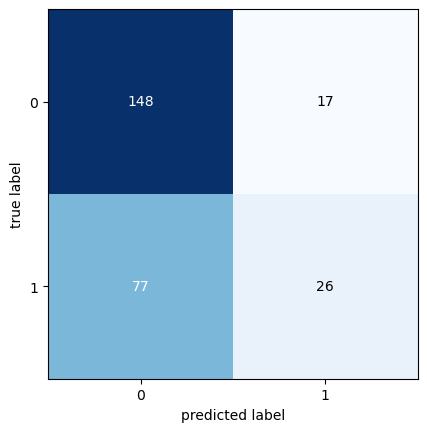



LogisticRegression
80.59701492537313


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


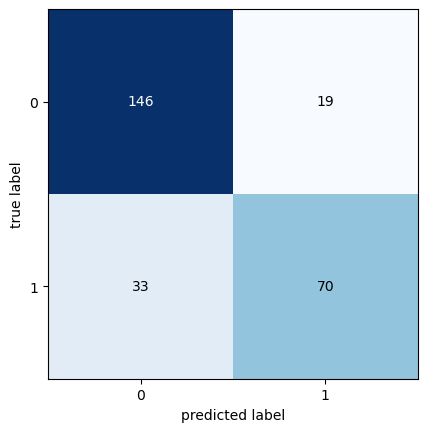



RandomForestClassifier
81.34328358208955


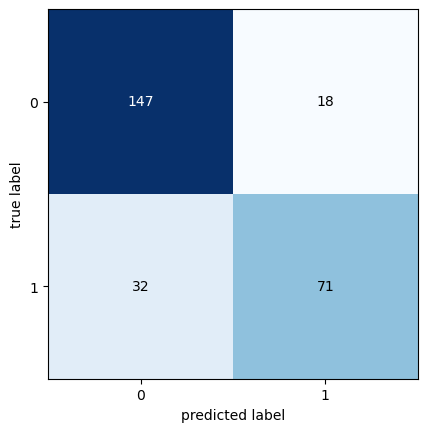



DecisionTreeClassifier
79.1044776119403


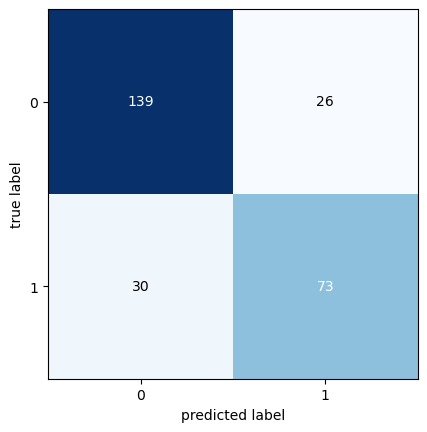



KNeighborsClassifier
71.64179104477611


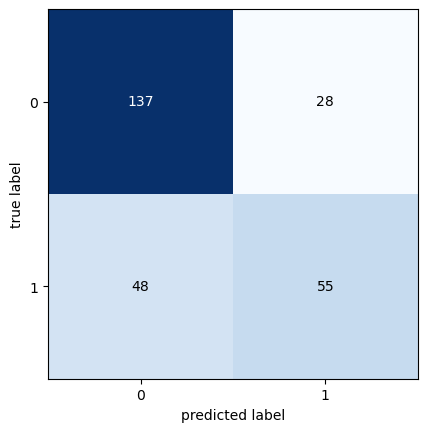



AdaBoostClassifier
81.71641791044776


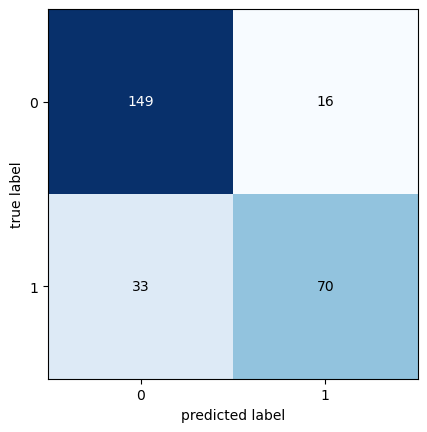



GradientBoostingClassifier
80.97014925373134


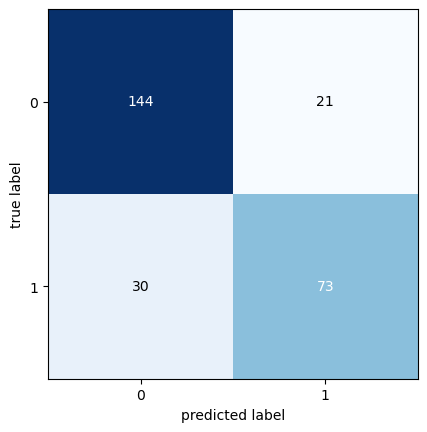

In [31]:
for i in models:
    name=i[1]
    model=i[0]
    print(name)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(accuracy_score(y_test,y_pred)*100)
    cnf=confusion_matrix(y_test,y_pred)
    fig,ax=plot_confusion_matrix(conf_mat=cnf)
    plt.show()
    print("\n")
    